# Install necessary libraries

In [82]:
#!pip install pandasql

Processing c:\users\sandipto.sanyal\appdata\local\pip\cache\wheels\53\6c\18\b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9\pandasql-0.7.3-cp37-none-any.whl
Processing c:\users\sandipto.sanyal\appdata\local\pip\cache\wheels\27\96\77\0695ac3b6ad6c91d607f9a19cfb45cdf416e5b564b77a64a9b\sqlalchemy-1.3.15-cp37-cp37m-win_amd64.whl


# Import Libraries

In [83]:
import pandas as pd
import os
from plotnine import *
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from pandasql import sqldf

# Set path for datasets

In [3]:
path = 'datasets'
df = pd.read_csv(os.path.join(path, 'earthquake.csv'))

# Display sample of data

In [4]:
display(df.head())

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


# Get basic descriptive statistics

In [5]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


# Get column datatypes

In [6]:
df.dtypes

Date                           object
Time                           object
Latitude                      float64
Longitude                     float64
Type                           object
Depth                         float64
Depth Error                   float64
Depth Seismic Stations        float64
Magnitude                     float64
Magnitude Type                 object
Magnitude Error               float64
Magnitude Seismic Stations    float64
Azimuthal Gap                 float64
Horizontal Distance           float64
Horizontal Error              float64
Root Mean Square              float64
ID                             object
Source                         object
Location Source                object
Magnitude Source               object
Status                         object
dtype: object

# Convert date time to datetime object

In [41]:
def convert_to_date_time(n):
    applicable_formats = ['%m/%d/%Y %H:%M:%S',
                          '%Y-%m-%dT%H:%M:%S.%fZ'
                         ]
    try:
        return datetime.strptime(n,applicable_formats[0])
    except:
        try:
            return datetime.strptime(n.split(' ')[0], applicable_formats[1])
        except Exception as e:
            print("Error: {}".format(e))
df['datetime'] = df["Date"] + " " + df["Time"]
df['datetime'] = df['datetime'].apply(convert_to_date_time)
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,datetime
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02 13:44:18
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04 11:29:49
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05 18:05:58
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08 18:49:43
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09 13:32:50


# Find columns with NaNs
We are checking which columns contain NaN values. This helps us to understand whether that particular column is worth studying for or not.

In [43]:
df.isna().sum().sort_values(ascending=False)

Magnitude Error               23085
Horizontal Error              22256
Horizontal Distance           21808
Magnitude Seismic Stations    20848
Depth Error                   18951
Depth Seismic Stations        16315
Azimuthal Gap                 16113
Root Mean Square               6060
Magnitude Type                    3
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
datetime                          0
Magnitude                         0
Status                            0
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Date                              0
dtype: int64

# Remove NaN from Magnitude Type
We will remove rows containing NaN in Magnitude Type as it will interfere with analysis later

In [164]:
df = df[~df['Magnitude Type'].isna()]

# Univariate data analysis of categorical columns

## Type
Here we try to visualize the distribution of Type of earthquake in our dataset

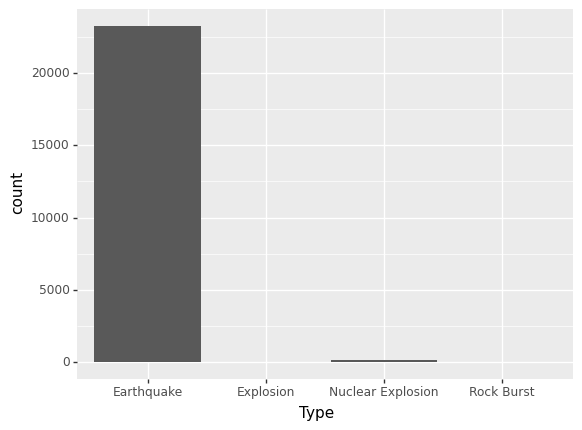

<ggplot: (129146375786)>

In [165]:
(ggplot(data=df) +
 aes(x='Type') +
 geom_bar()
)

<b>Inference: </b>We can see that most of the data belong to type Earthquake. According to the categories we assume that Earthquake means natural earthquake.

# Univariate analysis of Continuous variable

## Magnitude

In [169]:
g1 = (ggplot(data=df)
     + aes(x='Magnitude')
     + geom_histogram(bins=20) 
     + theme(figure_size=(6,4))
     + labs(title="Distribution of Magnitude"))

g2 = (ggplot(data=df)
 + aes(x='Magnitude', fill="Magnitude Type")
 + geom_histogram(bins=20)
 + facet_wrap("Magnitude Type", scales="free")
 + theme(figure_size=(10,7), panel_spacing_y=0.3, panel_spacing_x=0.5)
 + labs(title="Distribution of Magnitude for different Magnitude Type")
)

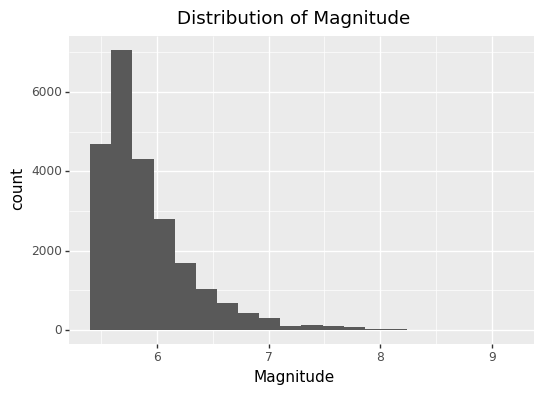

<ggplot: (-9223371907702682343)>

In [170]:
g1

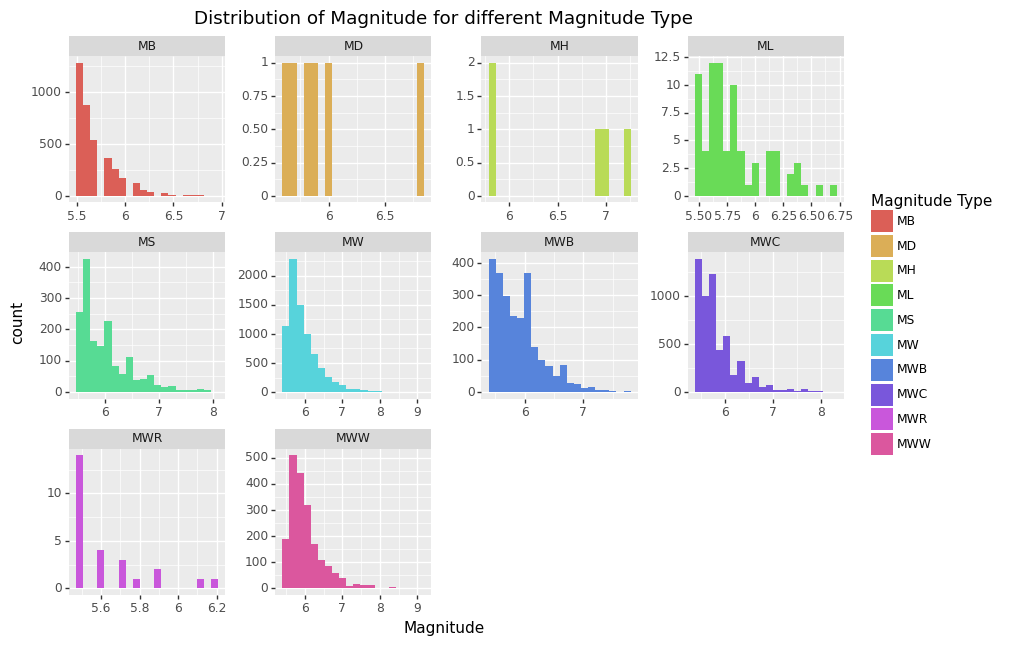

<ggplot: (129152331896)>

In [171]:
g2

<b>Inference: </b>From the above plots we can conclude below:
1. Most of the earth quakes are of magnitude between 5.5 to 6.
1. Our dataset consists of different Magnitude Type. From the 2nd plot it is evident that some Magnitude type are dedicated to measure earthquakes of magnitude lower than 5.6 while some are dedicated for magnitude higher than 5.6.

# View yearwise variations

## Group data by year
Below we will group our data to find the yearwise mean of the magnitudes

In [187]:
sql = """
SELECT 
strftime("%Y", datetime) AS YEAR,
AVG(Magnitude),
COUNT(Magnitude)
from
df
GROUP BY YEAR
"""
yearwise_mean_magnitude = sqldf(sql)
yearwise_mean_magnitude['YEAR'] = pd.to_datetime(yearwise_mean_magnitude['YEAR'], format='%Y')
yearwise_mean_magnitude.head()

,YEAR,AVG(Magnitude),COUNT(Magnitude)
0,1965-01-01,6.014159,339
1,1966-01-01,6.040470,234
2,1967-01-01,6.003922,255
3,1968-01-01,6.078525,305
4,1969-01-01,6.009350,323


## View the chart
Below we will plot yearwise mean magnitude against time

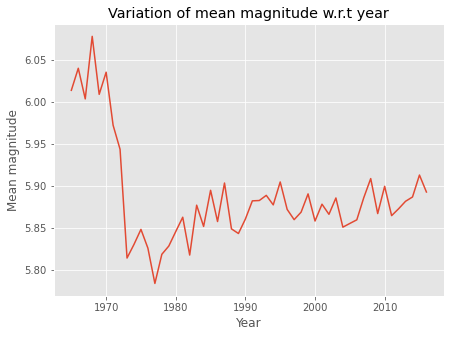

In [173]:
figure = plt.figure(figsize=(7,5))
plt.plot(yearwise_mean_magnitude['YEAR'], yearwise_mean_magnitude['AVG(Magnitude)'])
plt.xlabel('Year')
plt.ylabel('Mean magnitude')
plt.title('Variation of mean magnitude w.r.t year')
plt.show()

<b>Inference: </b>At first glance it appears the mean of the magnitude of the earthquakes dropped drastically in and around 1970's. But a careful observation will reveal that the drop is only 0.25 in magnitude.

## View yearwise variation of number of earthquakes

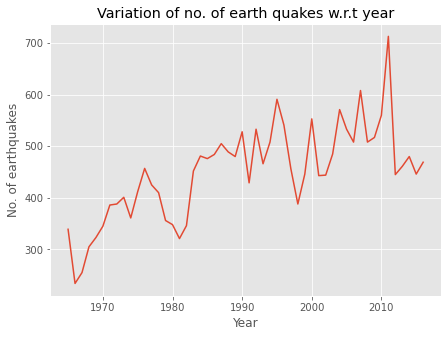

In [174]:
figure = plt.figure(figsize=(7,5))
plt.plot(yearwise_mean_magnitude['YEAR'], yearwise_mean_magnitude['COUNT(Magnitude)'])
plt.xlabel('Year')
plt.ylabel('No. of earthquakes')
plt.title('Variation of no. of earth quakes w.r.t year')
plt.show()

<b>Inference: </b>We can see that the variation of number of earthquakes in our dataset shows an increasing trend yearwise especially after 1980. This can be the result one of the below factors:
 - Number of earthquakes has really increased as a result of natural phenomenon
 - Use of sophisticated means of measurement methodology like Magnitude Type
 - Advent of more monitoring stations

Let's delve deeper into this investigation

# View variation in count of Magnitude Types with year

## Group count of Magnitude Type with year

In [175]:
sql = """
SELECT 
strftime("%Y", datetime) AS YEAR,
`Magnitude Type`,
COUNT(`Magnitude Type`) AS COUNT
from
df
GROUP BY YEAR, `Magnitude Type`
ORDER BY YEAR DESC, COUNT DESC
"""
yearwise_count_magnitude_type = sqldf(sql)
yearwise_count_magnitude_type['YEAR'] = pd.to_datetime(yearwise_count_magnitude_type['YEAR'], format='%Y')
yearwise_count_magnitude_type.head()

,YEAR,Magnitude Type,COUNT
0,2016-01-01,MWW,372
1,2016-01-01,MWB,42
2,2016-01-01,MB,31
3,2016-01-01,MWC,16
4,2016-01-01,ML,5


## View chart
Below we will visualize how with the advent of years we saw introduction of new Magnitude Types

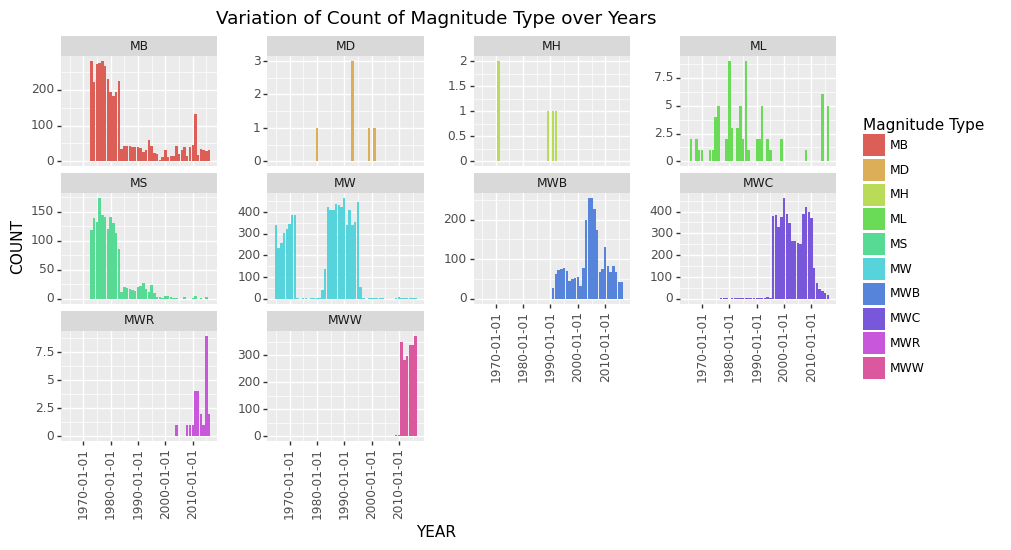

<ggplot: (-9223371907712276031)>

In [178]:
(ggplot(data=yearwise_count_magnitude_type)
+ aes(x='YEAR', y='COUNT', fill="Magnitude Type")
+ geom_col()
+ facet_wrap("Magnitude Type", scales="free_y")
+ theme(axis_text_x=element_text(angle=90), panel_spacing_x=0.5, figure_size=(10,5))
+ labs(title="Variation of Count of Magnitude Type over Years")
)

<b>Inference: </b>Here we are specifically concentrating into Magnitude Units which have high counts (> 100). The above plots show a clear example that over the years usage of magnitude type changed from "MB" with high usage in around 1970-1990 to "MWB", "MWC" in between 2000-2010 and "MWW" from 2010. This clearly indicates that the increase in number of earth quakes is in our dataset is perhaps mostly due to advent of new ways of measurements and hence higher number in reporting of the earthquakes.

# View variation in count of Sources with year

## Group Source Counts with Year
Let's dive to check whether with time the number of seismic network source for monitoring earthquakes has increased.

In [188]:
sql = """
SELECT 
strftime("%Y", datetime) AS YEAR,
`Source`,
COUNT(`Source`) AS COUNT
from
df
GROUP BY YEAR, Source
ORDER BY COUNT DESC, YEAR DESC
"""
yearwise_count_Source = sqldf(sql)
yearwise_count_Source['YEAR'] = pd.to_datetime(yearwise_count_Source['YEAR'], format='%Y')

## View which sources reported high number of earthquakes

In [189]:
yearwise_count_Source[yearwise_count_Source.COUNT >=100]

,YEAR,Source,COUNT
0,2011-01-01,US,711
1,2007-01-01,US,606
2,1995-01-01,US,587
3,2004-01-01,US,567
4,2010-01-01,US,553
5,2000-01-01,US,551
6,1996-01-01,US,540
7,2005-01-01,US,532
8,1990-01-01,US,524
9,1992-01-01,US,518


## View the charts
Below we will visualize whether with time there was increase in sources

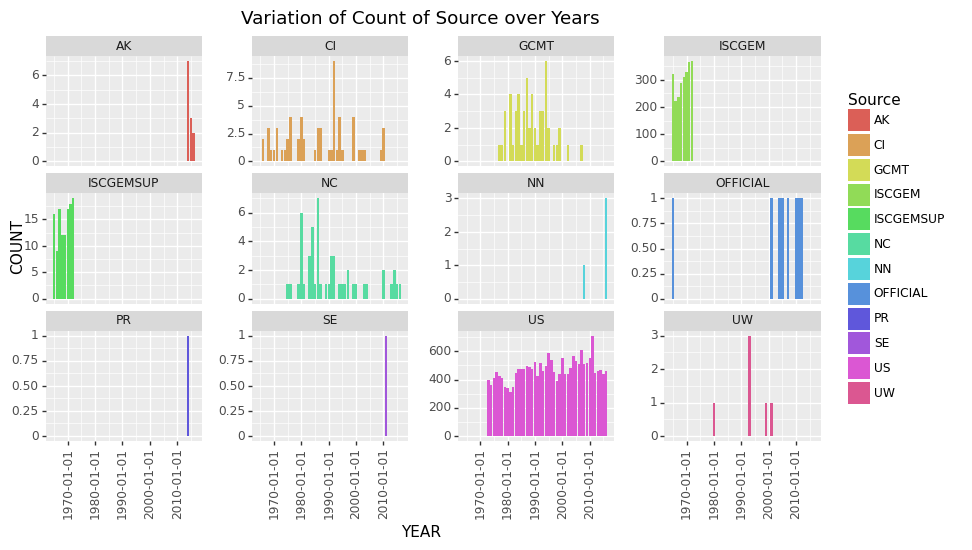

<ggplot: (129146312189)>

In [190]:
(ggplot(data=yearwise_count_Source)
+ aes(x='YEAR', y='COUNT', fill="Source")
+ geom_col()
+ facet_wrap("Source", scales="free_y")
+ theme(axis_text_x=element_text(angle=90), panel_spacing_x=0.5, figure_size=(10,5))
+ labs(title="Variation of Count of Source over Years")
)

<b>Inference: </b>From the above plot it is seen that with the advent of years no such Source is contributing as such to the increase in earthquakes. The Source "US" shows consistently active from 1970-2010 and beyond with more or less uniform distribution. Thus the rise in number of earthquakes changes in Magnitude Type is probably playing as one of the key factors in measuring and reporting the earthquakes.

# Conclusion
From the above analysis we can conclude that with the advent of time changes and sophistication in Magnitude type is playing a key role in the rise in number of earthquakes.